In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yahooFinance
plt.style.use('fivethirtyeight')

In [45]:
#Get the stock data set
Getstockinfo = yahooFinance.Ticker("MSFT")
 
# Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y and ytd.
df = Getstockinfo.history(period="10y")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-11-23 00:00:00-05:00,22.453101,22.898370,22.428364,22.840651,57845700,0.00,0
2012-11-26 00:00:00-05:00,22.708721,22.741703,22.403628,22.585033,85198700,0.00,0
2012-11-27 00:00:00-05:00,22.560297,22.576787,22.296434,22.329416,45018600,0.00,0
2012-11-28 00:00:00-05:00,22.271698,22.585035,22.073801,22.560299,53018400,0.00,0
2012-11-29 00:00:00-05:00,22.354159,22.560302,22.148015,22.222227,69551400,0.00,0
...,...,...,...,...,...,...,...
2022-11-16 00:00:00-05:00,242.789993,243.800003,240.419998,241.729996,24093300,0.68,0
2022-11-17 00:00:00-05:00,237.779999,243.250000,237.630005,241.679993,23123500,0.00,0
2022-11-18 00:00:00-05:00,243.509995,243.740005,239.029999,241.220001,27591800,0.00,0


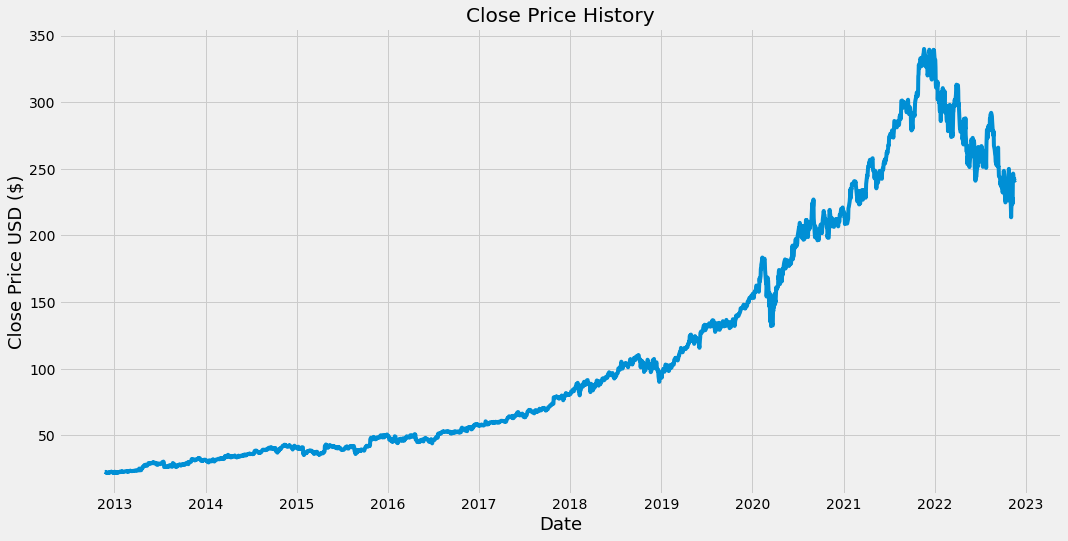

In [46]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [48]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values


# Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset)*.8)

training_data_len
# dataset

2015

In [49]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00344672],
       [0.00264335],
       [0.00183998],
       ...,
       [0.68978381],
       [0.6923924 ],
       [0.69232953]])

In [50]:
#Create training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60 , len(train_data)):
    x_train.append(train_data[i-60:i , 0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00344672, 0.00264335, 0.00183998, 0.00256561, 0.0015031 ,
       0.00064788, 0.00015549, 0.        , 0.00077747, 0.00093293,
       0.00023324, 0.00147715, 0.00246195, 0.00225462, 0.00191771,
       0.00114026, 0.0018918 , 0.0030839 , 0.00243605, 0.00339488,
       0.00279885, 0.00178815, 0.00126985, 0.00152898, 0.00046645,
       0.00088112, 0.00323938, 0.00228053, 0.00095885, 0.00082929,
       0.00046645, 0.00085519, 0.00023324, 0.00119208, 0.00134757,
       0.00217688, 0.00173631, 0.00228053, 0.00228053, 0.00202139,
       0.00321349, 0.00326531, 0.00391321, 0.00399094, 0.00425009,
       0.00383543, 0.00279885, 0.00404277, 0.00277292, 0.00292841,
       0.00251378, 0.00235827, 0.00305799, 0.00386135, 0.00391321,
       0.00430192, 0.00432783, 0.00425009, 0.0049556 , 0.00448525])]
[0.0034923180697815637]

[array([0.00344672, 0.00264335, 0.00183998, 0.00256561, 0.0015031 ,
       0.00064788, 0.00015549, 0.        , 0.00077747, 0.00093293,
       0.00023324, 0.00147715, 0.

In [51]:
# Convert the x_train and y_train to numpy array
x_train , y_train = np.array(x_train) , np.array(y_train)

In [52]:
# Reshape the data
x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1] , 1))
x_train.shape

(1955, 60, 1)

In [53]:
# Build the LSTM Model 
model = Sequential()
model.add(LSTM(50, return_sequences = True , input_shape = (x_train.shape[1] , 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [54]:
#compile the model 
model.compile(optimizer='adam',loss='mean_squared_error')

In [55]:
# Train the model
model.fit(x_train, y_train , batch_size=1 , epochs=1)

1955/1955 [==============================] - 58s 28ms/step - loss: 5.4478e-04


In [56]:

# Create the testing data set
# Create a new array containing scaled values from index 2074 to 2534
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60 , len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [57]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [58]:
x_test = np.reshape(x_test , (x_test.shape[0], x_test.shape[1] , 1))

In [59]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 2s 20ms/step


In [60]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean( (predictions - y_test)**2))
rmse

32.59174187350329

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


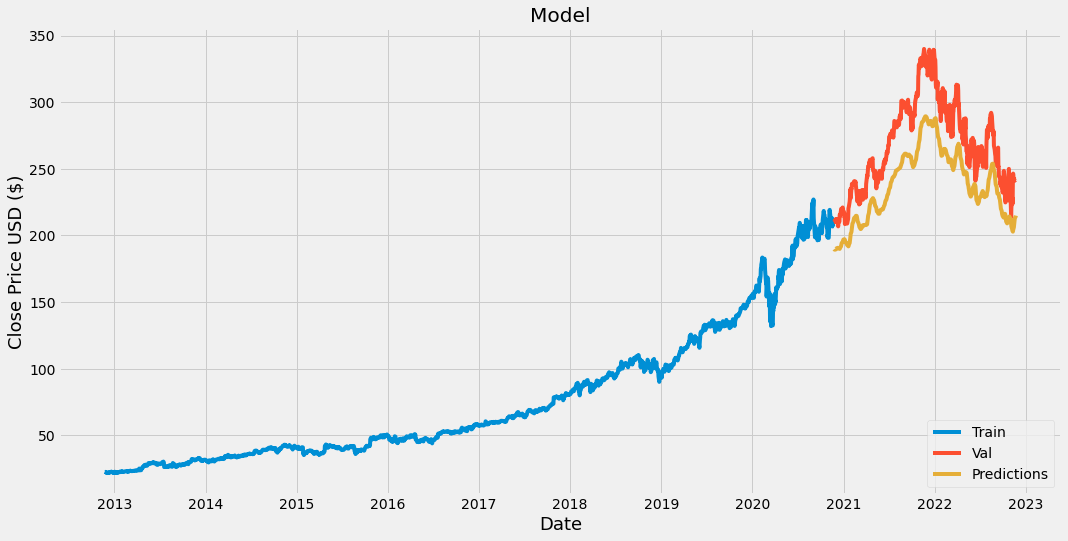

In [61]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'],loc = 'lower right')
plt.show()

In [62]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-11-24 00:00:00-05:00,210.113464,189.687958
2020-11-25 00:00:00-05:00,210.123260,189.433517
2020-11-27 00:00:00-05:00,211.459457,189.356476
2020-11-30 00:00:00-05:00,210.319794,189.494125
2020-12-01 00:00:00-05:00,212.422302,189.639465
...,...,...
2022-11-16 00:00:00-05:00,241.729996,210.096146
2022-11-17 00:00:00-05:00,241.679993,211.716003
2022-11-18 00:00:00-05:00,241.220001,213.051636


In [65]:
# Get the quote
#Get the stock data set
Getstockinfo = yahooFinance.Ticker("MSFT")
 
# Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y and ytd.
msft_quote = Getstockinfo.history(period="10y")

# Create a new dataframe
new_df = msft_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-2074:].values
#Scale the data to be values between 0 to 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test , (X_test.shape[0],X_test.shape[1],1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 1s 961ms/step
[[215.51962]]


In [68]:
# Get the quote
# msft_quote2 = web.DataReader('MSFT',data_source='yahoo',start='2022-08-09',end='2022-08-09')
# print(apple_quote2['Close'])
# Get the quote
#Get the stock data set
Getstockinfo = yahooFinance.Ticker("MSFT")
 
# Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y and ytd.
msft_quote2 = Getstockinfo.history(period="10y")
print(msft_quote2['Close'])


Date
2012-11-23 00:00:00-05:00     22.840649
2012-11-26 00:00:00-05:00     22.585035
2012-11-27 00:00:00-05:00     22.329416
2012-11-28 00:00:00-05:00     22.560293
2012-11-29 00:00:00-05:00     22.222216
                                ...    
2022-11-16 00:00:00-05:00    241.729996
2022-11-17 00:00:00-05:00    241.679993
2022-11-18 00:00:00-05:00    241.220001
2022-11-21 00:00:00-05:00    242.050003
2022-11-22 00:00:00-05:00    241.990005
Name: Close, Length: 2518, dtype: float64
